# Lending Club Case Study Introduction

The case study is for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Data understanding

The case study provides a loan.csv which consists of 39717 records with 111 columns in a comma seperated file. 
#####  Below are the insights gathered looking at the data
1. There are columns with all the values in a row as marked as na, which add no value to the analysis   
2. The id or member id can be considered as unique identification column as it has no duplicates 
3. The driving column identifed so far are "loan_status","
4. It's also noticed that the Data Dictionary has 116 columns but the loan.csv has 111 columns 

In [1]:
#import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.stats import norm

In [2]:
#quick take on the data
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
df = pd.read_csv("G://My Drive//Education//Master//artifacts"
                 "//upgrad//lending club case study//data//loan//loan.csv", low_memory=False)
print(df.shape)
print(df.info())
print(df.dtypes)
df.describe()
#total rows : 39717


(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                          

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
#check missing values in data

#check the nulls row wise

null_rows = df.isnull().all(axis=1).sum()
print('Count of empty Rows: {}'.format(null_rows))
# Review: There are 0 rows with missing values

#check the nulls column wise
null_columns = df.isnull().all(axis=0).sum()
print('Count of Columns with missing values: {}'.format(null_columns))
#Review: There are 54 columns with missing values

Count of empty Rows: 0
Count of Columns with missing values: 54


# Data Cleaning and Manipulation

In [4]:
### drop the variables which have only nan values or all values are missing

df = df.dropna(axis=1, how='all')

print("data shape is {}".format(df.shape))
df.describe()

data shape is (39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [5]:
#check for variables with nulls

null_percent = df.isnull().mean() * 100
print(null_percent)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [6]:
#dropping variables which have more > 50% null as they unlikely to provide meaningful insights, including them in analsysis might mislead 

columns_to_drop = ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]
df.drop(labels = columns_to_drop, axis =1, inplace=True)
print("data shape is {}".format(df.shape))
df.describe()

data shape is (39717, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [7]:
#dropping additional variables where mean,min, max are zeros or same as they unlikely to provide meaningful insights

columns_to_drop = ["collections_12_mths_ex_med","policy_code","acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt","tax_liens"]
df.drop(labels = columns_to_drop, axis =1, inplace=True)
print("data shape is {}".format(df.shape))
df.describe()

data shape is (39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [8]:
# Check for duplicate rows across the data set based on column: id

duplicate_id_count = len(df[df.duplicated(subset='id', keep=False)])
duplicate_mem_id_count = len(df[df.duplicated(subset='id', keep=False)])

print("No of duplicate ids: {}".format(duplicate_id_count))

print("No of duplicate members ids: {}".format(duplicate_mem_id_count))

#review : There are no duplicate ids and member ids

No of duplicate ids: 0
No of duplicate members ids: 0


In [9]:
# dropping variables which are not useful for the analysis

columns_to_drop = ["id","url","desc"]
df.drop(labels = columns_to_drop, axis =1, inplace=True)
print("data shape is {}".format(df.shape))
df.describe()

data shape is (39717, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### Data typing/casting before analysis

In [10]:
### remove % and cast int_rate to float, cast issue_d and earliest_cr_line into date


df['int_rate'] = df['int_rate'].map(lambda x: str(x).rstrip('%')).astype(float)
df['revol_util'] = df['revol_util'].map(lambda x: str(x).rstrip('%')).astype(float)
df['issue_d'] = pd.to_datetime(df['issue_d'], format ='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format ='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format ='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format ='%b-%y')
print("data shape is {}".format(df.shape))
df.describe()

data shape is (39717, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [11]:
print("pre cleaning :")
print(df.pub_rec_bankruptcies.isnull().sum())
print("post cleaning :")
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

pre cleaning :
697
post cleaning :
0


In [12]:
#checking min and max for all the date variables

df[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d']].agg(['min','mean','max'])

#review : seems like the earliest_cr_line has a future date , logic needs to be reviewed

,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d
min,1969-02-01 00:00:00.000000000,2007-05-01 00:00:00.000000000,2008-01-01 00:00:00.000000000,2007-06-01 00:00:00.000000000
mean,1997-04-11 16:09:21.250849664,2014-09-07 19:16:08.007050496,2013-04-10 05:32:22.652474368,2010-11-03 23:26:45.166553344
max,2068-12-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2011-12-01 00:00:00.000000000


In [13]:
#logic to handle dates such as earliest_cr_line which are beyond 1970
def date_correction_beyond_1970(date):
    if date > pd.to_datetime('2012-01-01'):
        return date - pd.DateOffset(years=100)
    else:
        return date

#correcting earliest_cr_line as it has unrealistic dates due to a datetime limitation  
df['earliest_cr_line_corrected'] = df['earliest_cr_line'].apply(date_correction_beyond_1970)    

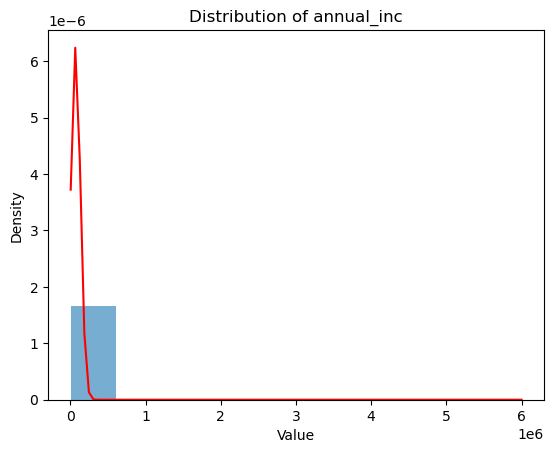

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [14]:
# check outliers for the annual_inc using box plot, based on the min, quantiles and max calculated in previous cells

fig, ax = plt.subplots()


ax.hist(df['annual_inc'], bins=10, density=True, alpha=0.6)

mean = df['annual_inc'].mean()
std_dev = df['annual_inc'].std()


x_axis = np.linspace(df['annual_inc'].min(), df['annual_inc'].max(), 100)


curve = norm.pdf(x_axis, mean, std_dev)


ax.plot(x_axis, curve, color='red')


ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of annual_inc')


plt.show()
df['annual_inc'].describe()
#review, the graph looks skewed based on the annual_inc

In [15]:
#removing the outliers using Interquartile ranges  as data is skewed

# calculate the first quartile (Q1)
Q1 = df['annual_inc'].quantile(0.25)

# calculate the third quartile (Q3)
Q3 = df['annual_inc'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# determine the lower bound
lower_bound = Q1 - (1.5 * IQR)

# determine the upper bound
upper_bound = Q3 + (1.5 * IQR)

# remove outliers from DataFrame
df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

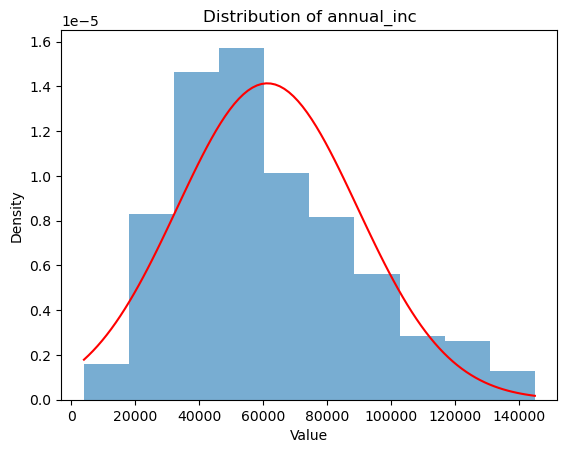

count     37874.000000
mean      61360.038960
std       28210.186388
min        4000.000000
25%       40000.000000
50%       56178.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [16]:
# distribution after outlier removal
fig, ax = plt.subplots()

# plot histogram for 'annual_inc'
ax.hist(df['annual_inc'], bins=10, density=True, alpha=0.6)

# calculate mean and standard deviation for 'Variable'
mean = df['annual_inc'].mean()
std_dev = df['annual_inc'].std()

# create range of values for the x-axis
x_axis = np.linspace(df['annual_inc'].min(), df['annual_inc'].max(), 100)

# generate normal distribution curve
curve = norm.pdf(x_axis, mean, std_dev)

# plot normal distribution curve
ax.plot(x_axis, curve, color='red')

# add axis labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of annual_inc')

# show plot
plt.show()

df['annual_inc'].describe()

#review : the distribution looks normal post outlier removal

# Identify key variable for the case study and perform univariate analysis

printing the % share of each loan status
Fully Paid     82.869515
Charged Off    14.339653
Current         2.790833
Name: loan_status, dtype: float64
printing the count of each loan status
Fully Paid     31386
Charged Off     5431
Current         1057
Name: loan_status, dtype: int64
data shape is (37874, 46)


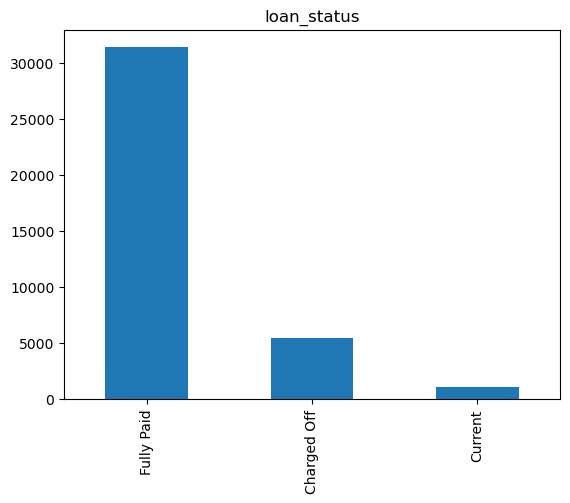

In [17]:
# Based on the data dictionary shared , loan_status is the key variable to perform the analysis

count = df['loan_status'].value_counts()
count.plot(kind='bar', title = 'loan_status')
print("printing the % share of each loan status")
print(df.loan_status.value_counts(normalize=True)*100)
print("printing the count of each loan status")
print(count)
print("data shape is {}".format(df.shape))

# Data Analysis

0    82.869515
1    14.339653
2     2.790833
Name: loan_status_num, dtype: float64
0    31386
1     5431
2     1057
Name: loan_status_num, dtype: int64
data shape is (37874, 47)


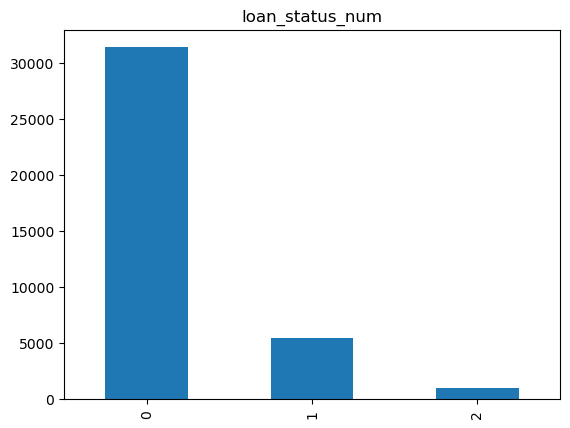

In [18]:
#derived a new variable to represent the loan_status in numeric format; 
# loan_status_num:  fully paid = 0 , Charged off = 1 and current = 2

df["loan_status_num"] = [1 if x=="Charged Off" else 2 if x=="Current" else 0 for x in df['loan_status']]

count = df['loan_status_num'].value_counts()
count.plot(kind='bar', title = 'loan_status_num')

print(df.loan_status_num.value_counts(normalize=True)*100)


print(count)
print("data shape is {}".format(df.shape))

In [19]:
#derive new variables extracted from date fields
df['issue_yr'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df['earliest_cr_line_yr'] = df['earliest_cr_line_corrected'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line_corrected'].dt.month

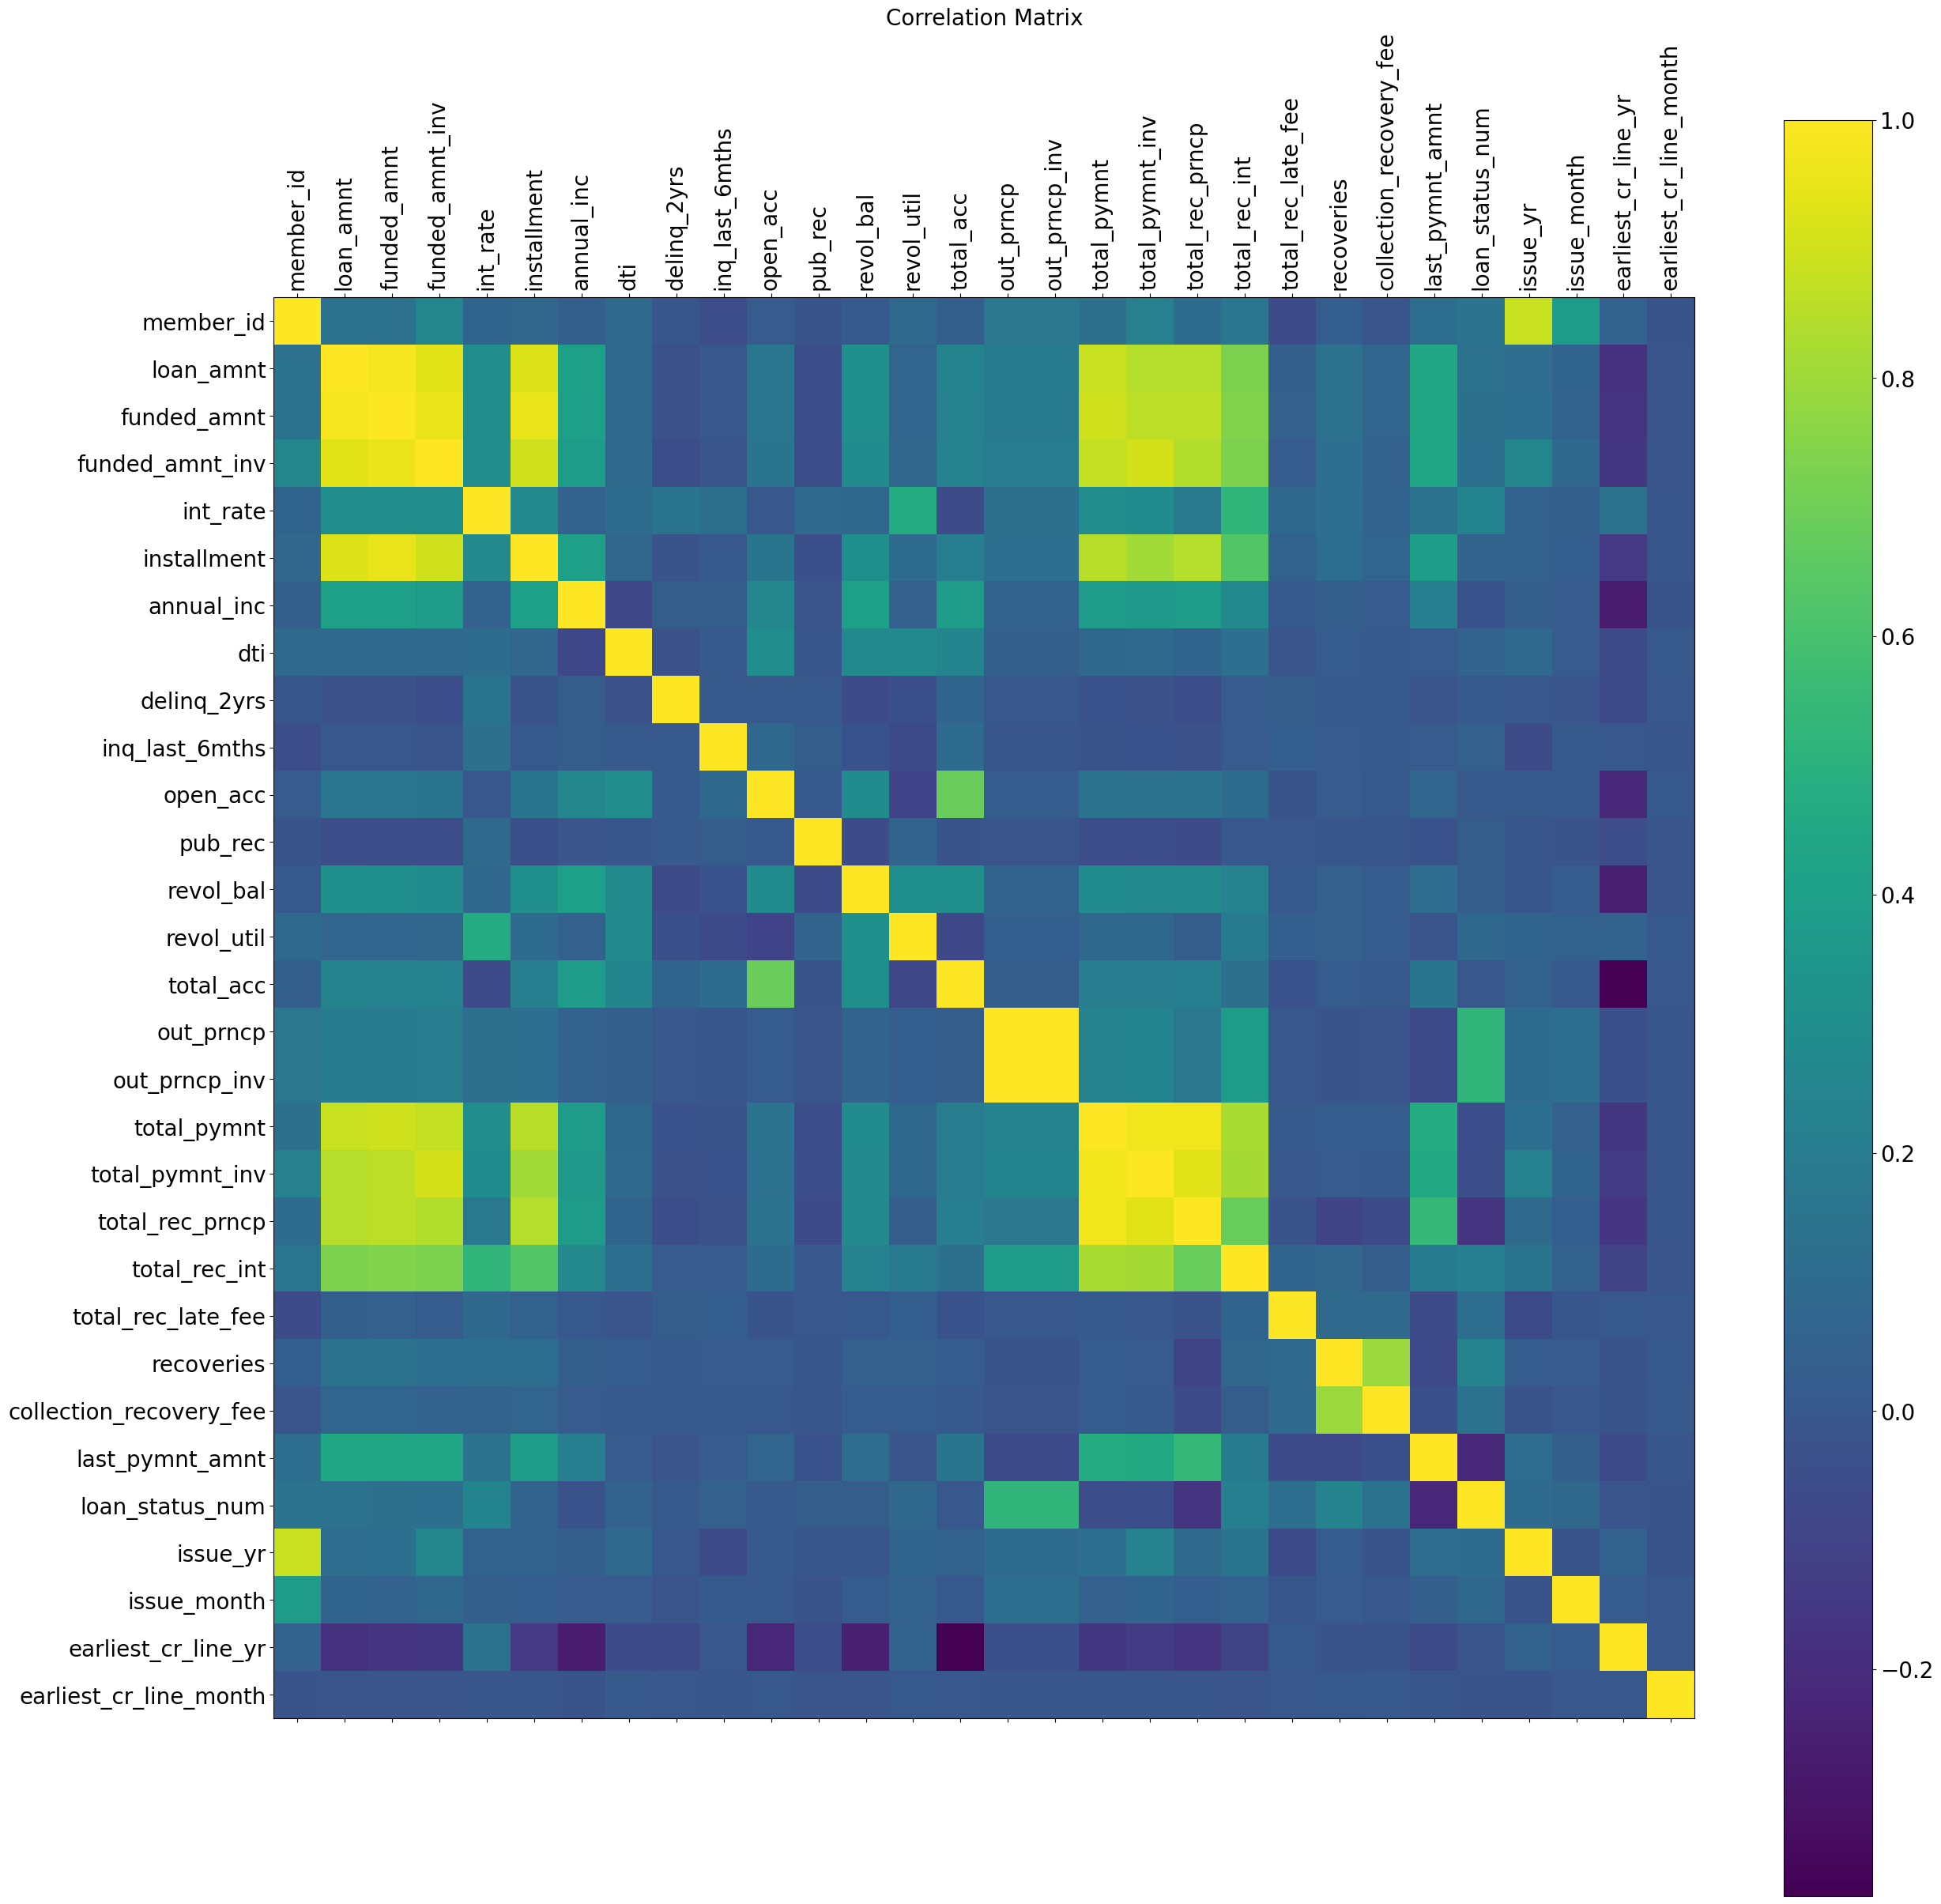

In [20]:
# Correlaration matrix for all the numeric variables
f = plt.figure(figsize=(29, 29))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=20);

#review : There is very less correlation between the variables except loan_amnt, funded_amnt and funded_amnt_inv

In [21]:
### Get correlation matrix to compare the correlation efficient between charged_off and other variables
df_corr=df.select_dtypes(['number']).corr()
df_corr

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status_num,issue_yr,issue_month,earliest_cr_line_yr,earliest_cr_line_month
member_id,1.000000,0.135636,0.145325,0.254192,0.070196,0.075858,0.038638,0.099167,-0.008312,-0.047979,0.017372,-0.017649,0.007661,0.093150,0.041266,0.169445,0.169407,0.132841,0.223605,0.105088,0.167000,-0.061593,0.034084,-0.013014,0.122545,0.148010,0.882142,0.379601,0.056361,-0.018900
loan_amnt,0.135636,1.000000,0.981827,0.939141,0.298959,0.929649,0.404589,0.093773,-0.036860,-0.000601,0.166819,-0.046711,0.315302,0.071193,0.240106,0.193895,0.193547,0.882146,0.848949,0.845890,0.728571,0.041700,0.137501,0.071330,0.443786,0.136307,0.118227,0.065388,-0.172559,-0.014572
funded_amnt,0.145325,0.981827,1.000000,0.957203,0.303630,0.955335,0.400340,0.093126,-0.036939,0.000156,0.164747,-0.047803,0.307590,0.075447,0.234813,0.195442,0.195140,0.898541,0.865329,0.863637,0.736697,0.043754,0.139659,0.073585,0.448783,0.133345,0.128768,0.055937,-0.165971,-0.014490
funded_amnt_inv,0.254192,0.939141,0.957203,1.000000,0.297780,0.902488,0.383779,0.100960,-0.043216,-0.014276,0.152582,-0.049399,0.288731,0.080062,0.227454,0.204278,0.204281,0.876114,0.909112,0.839016,0.729207,0.024051,0.126922,0.059157,0.439295,0.125986,0.258247,0.082720,-0.150549,-0.014737
int_rate,0.070196,0.298959,0.303630,0.297780,1.000000,0.274381,0.059482,0.113181,0.155045,0.133036,-0.003416,0.101773,0.083173,0.469413,-0.060853,0.130139,0.130195,0.297264,0.292789,0.175391,0.523816,0.090473,0.120658,0.064660,0.149068,0.244741,0.051111,0.039371,0.136264,-0.008363
installment,0.075858,0.929649,0.955335,0.902488,0.274381,1.000000,0.400542,0.080801,-0.024786,0.000632,0.161321,-0.042235,0.307156,0.103174,0.213993,0.125169,0.124993,0.852625,0.811721,0.844843,0.633345,0.052369,0.120243,0.073421,0.396216,0.062289,0.053827,0.036066,-0.146875,-0.010035
annual_inc,0.038638,0.404589,0.400340,0.383779,0.059482,0.400542,1.000000,-0.075125,0.032318,0.028252,0.263531,-0.012578,0.398950,0.047530,0.385027,0.056298,0.056028,0.383085,0.369023,0.385690,0.272073,0.004185,0.038945,0.019697,0.213940,-0.031200,0.041092,0.018127,-0.273486,-0.016761
dti,0.099167,0.093773,0.093126,0.100960,0.113181,0.080801,-0.075125,1.000000,-0.032313,0.006763,0.298842,-0.006556,0.271479,0.276212,0.246487,0.042335,0.042267,0.091428,0.097564,0.068046,0.125773,-0.011478,0.026176,0.010839,0.019879,0.057824,0.096200,0.021135,-0.055850,0.009048
delinq_2yrs,-0.008312,-0.036860,-0.036939,-0.043216,0.155045,-0.024786,0.032318,-0.032313,1.000000,0.007847,0.014469,0.007422,-0.060603,-0.042046,0.068504,-0.002836,-0.003065,-0.027916,-0.034414,-0.043441,0.018168,0.031365,0.010765,0.011557,-0.014282,0.012692,-0.003568,-0.012266,-0.065407,-0.000923
inq_last_6mths,-0.047979,-0.000601,0.000156,-0.014276,0.133036,0.000632,0.028252,0.006763,0.007847,1.000000,0.089817,0.027483,-0.027564,-0.066819,0.106494,-0.009777,-0.009444,-0.020244,-0.029632,-0.033750,0.016858,0.032843,0.016738,0.010123,0.021900,0.047719,-0.061344,0.012669,-0.003738,-0.005533


In [22]:
#Generic function to generate box plot out of a given variables with loan_status_num
def generate_box_plot_by_var_loan_status_num(df,x_col,y_col):
    palette = sns.color_palette(['#2ca02c', '#ff7f0e', '#1f77b4'])
    colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
    labels = ['Fully Paid', 'Charged Off', 'Current']
    legend_dict = dict(zip(labels, colors))
    legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, label=label) for label, color in legend_dict.items()]
    sns.boxplot(x=x_col, y=y_col, data=df, palette=palette)
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0.5), loc='center left')
    plt.show()

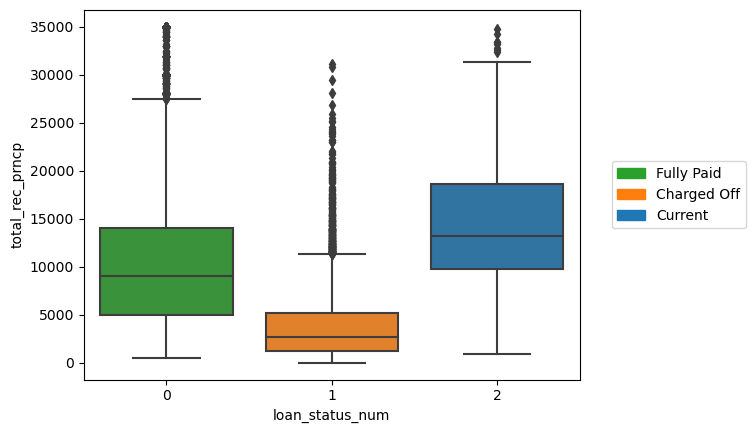

In [23]:
x_col = 'loan_status_num'
y_col = 'total_rec_prncp'

generate_box_plot_by_var_loan_status_num(df=df,x_col=x_col,y_col=y_col)

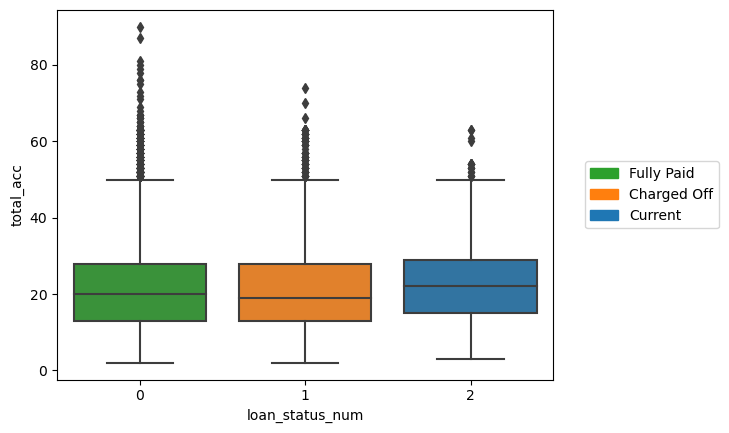

In [24]:
x_col = 'loan_status_num'
y_col = 'total_acc'


generate_box_plot_by_var_loan_status_num(df=df,x_col=x_col,y_col=y_col)

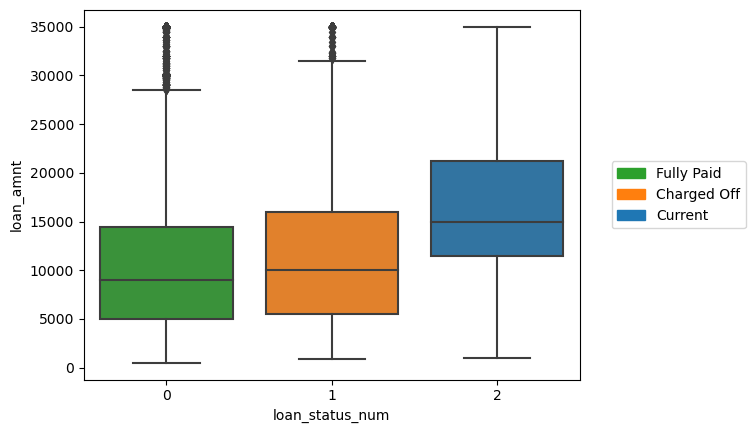

In [25]:
x_col = 'loan_status_num'
y_col = 'loan_amnt'

generate_box_plot_by_var_loan_status_num(df=df,x_col=x_col,y_col=y_col)

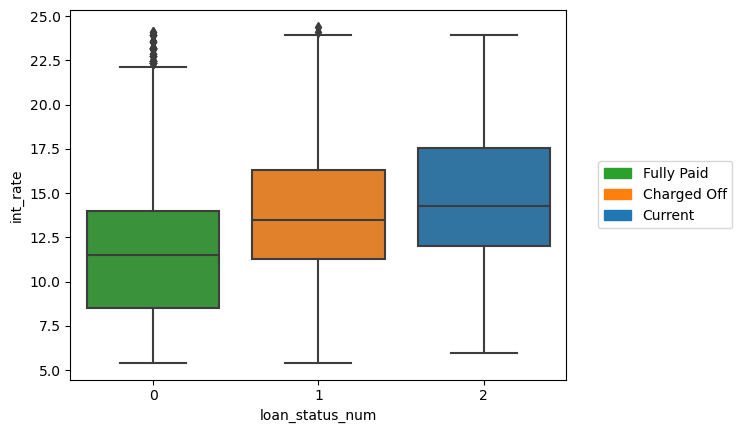

In [26]:
x_col = 'loan_status_num'
y_col = 'int_rate'

generate_box_plot_by_var_loan_status_num(df=df,x_col=x_col,y_col=y_col)

# bivariate analysis

In [27]:
#Generic function to generate a bar plot out of a given variable with loan_status
def generate_bar_plot_by_var_vs_loan_status(df,col_vs_loan_status):
    #create a pivot with a given variable and loan_status
    col_vs_loan_status_df = df.groupby([col_vs_loan_status, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    col_vs_loan_status_df['Total'] = col_vs_loan_status_df['Charged Off'] + col_vs_loan_status_df['Current'] + col_vs_loan_status_df['Fully Paid'] 
    col_vs_loan_status_df['Chargedoff_percent'] = col_vs_loan_status_df['Charged Off'] / col_vs_loan_status_df['Total']
    col_vs_loan_status_df.columns.set_names(['row_id'], inplace = True)
    
    #barplot generation based on the pivot
    fig, ax1 = plt.subplots(figsize=(20, 5))
    ax1.set_title('{} vs Charged off'.format(col_vs_loan_status),fontsize=20,color = 'b')
    ax1=sns.barplot(y='Chargedoff_percent', x=col_vs_loan_status, data=col_vs_loan_status_df, width=0.2)
    ax1.set_ylabel(col_vs_loan_status,fontsize=12,color='w')
    ax1.set_xlabel(col_vs_loan_status,fontsize=12,color = 'b')
    ax1.set_ylabel('Chargedoff ratio',fontsize=12,color = 'b')
    plt.show()

    return col_vs_loan_status_df.sort_values('Chargedoff_percent', ascending=False)


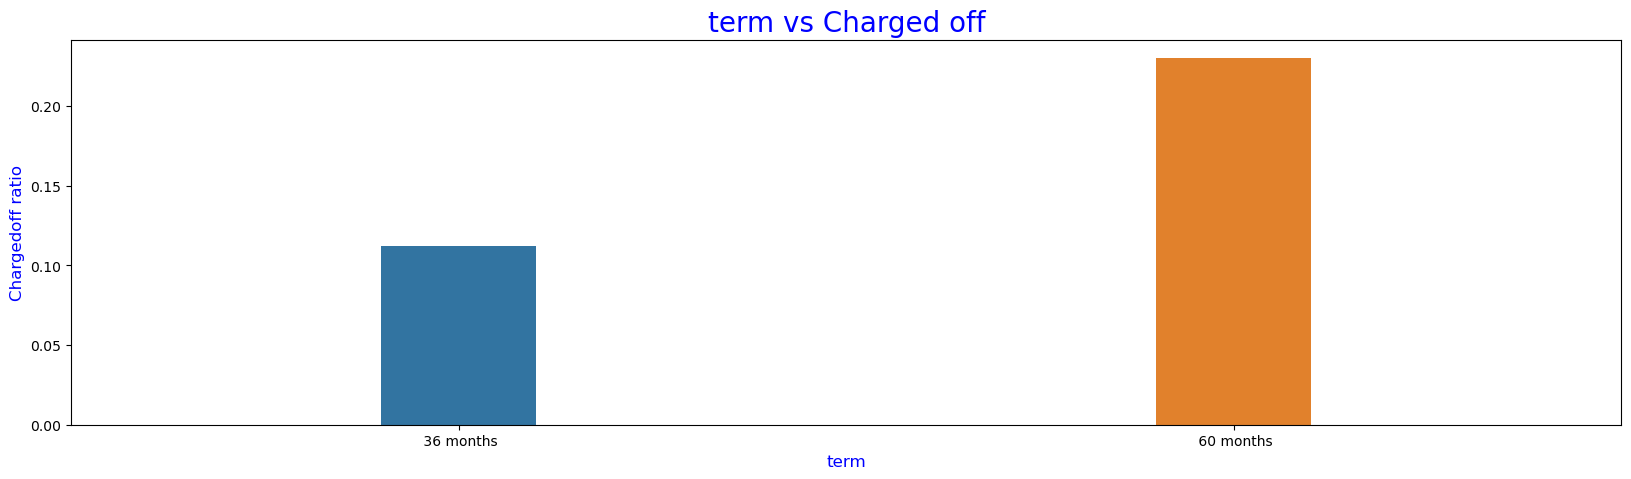

row_id,term,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
1,60 months,2311.0,1057.0,6668.0,10036.0,0.230271
0,36 months,3120.0,0.0,24718.0,27838.0,0.112077


In [28]:
#term versus loan_status
col_vs_loan_status='term'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review : customers who took 60 month term loan defaulted twice than who did 36 months term

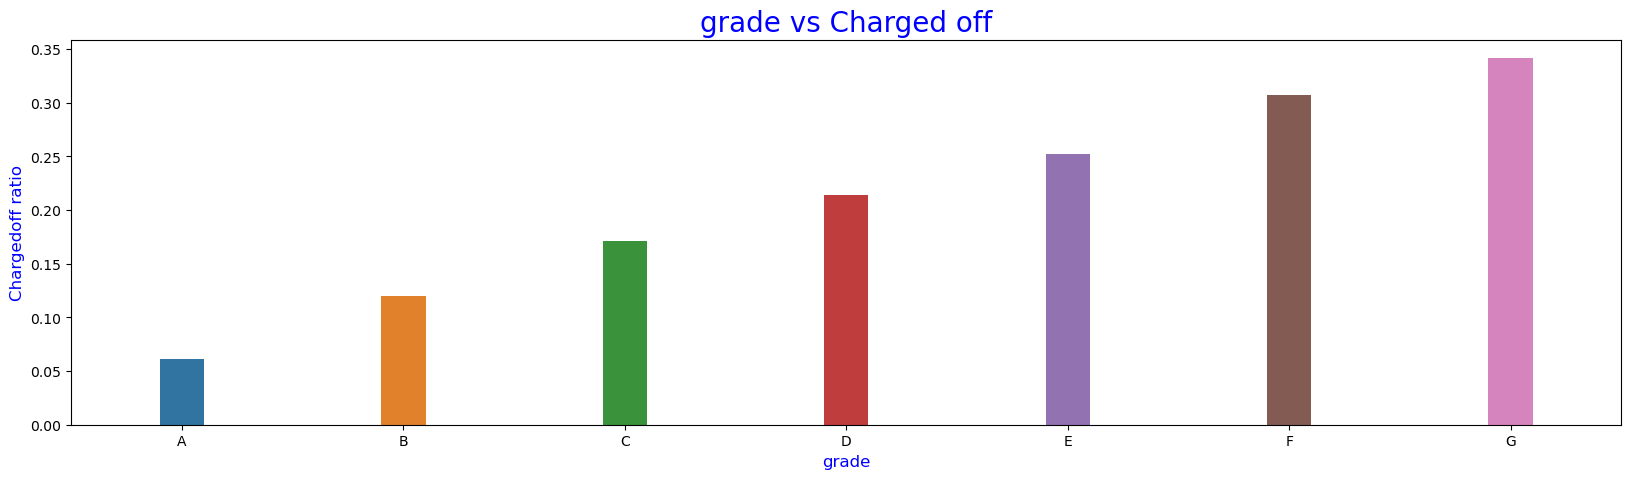

row_id,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
6,G,96,14,171,281,0.341637
5,F,291,58,599,948,0.306962
4,E,662,163,1799,2624,0.252287
3,D,1083,208,3773,5064,0.213863
2,C,1326,249,6180,7755,0.170986
1,B,1380,326,9772,11478,0.120230
0,A,593,39,9092,9724,0.060983


In [29]:
#grade versus loan_status
col_vs_loan_status='grade'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review: customers whose grade increased from ‘A’ through ‘G’ , there is a linear increase in the default cases, G being the highest

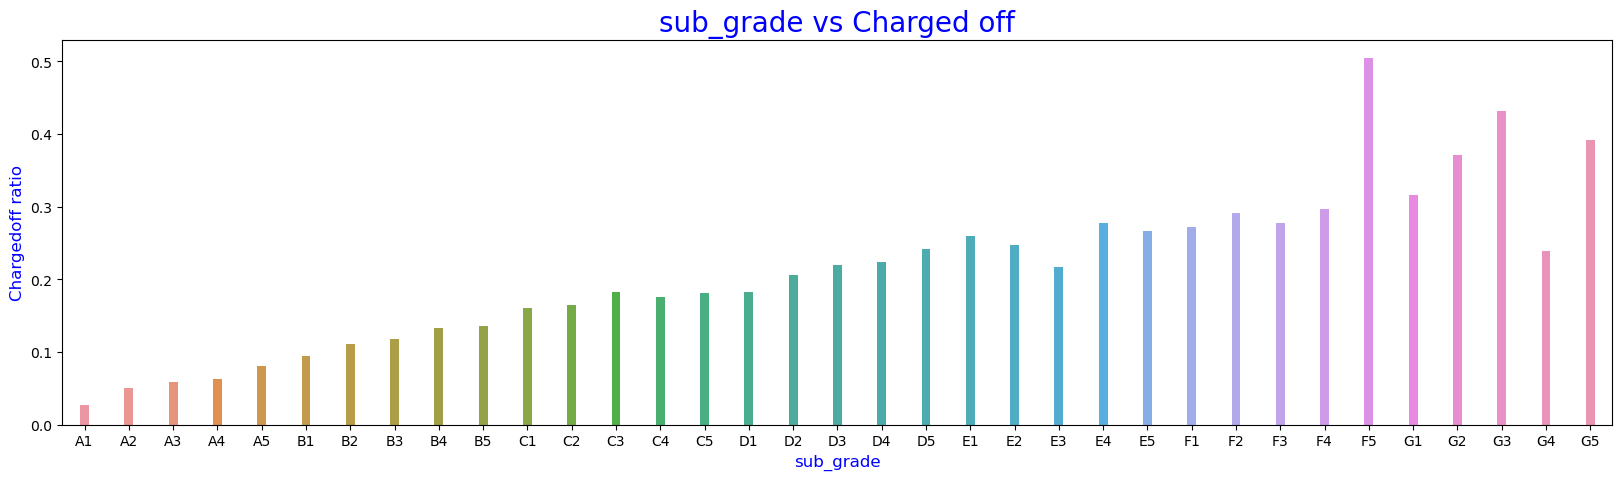

row_id,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
29,F5,52.0,3.0,48.0,103.0,0.504854
32,G3,19.0,3.0,22.0,44.0,0.431818
34,G5,9.0,0.0,14.0,23.0,0.391304
31,G2,26.0,1.0,43.0,70.0,0.371429
30,G1,31.0,9.0,58.0,98.0,0.316327
28,F4,46.0,15.0,94.0,155.0,0.296774
26,F2,67.0,13.0,150.0,230.0,0.291304
23,E4,117.0,25.0,279.0,421.0,0.277910
27,F3,46.0,9.0,111.0,166.0,0.277108
25,F1,80.0,18.0,196.0,294.0,0.272109


In [30]:
#sub_grade versus loan_status
col_vs_loan_status='sub_grade'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review : customers whose grade increased from ‘A-X’ through ‘G-X’ , there is (close to) linear increase in the default cases, F5 being the highest, similar to grade

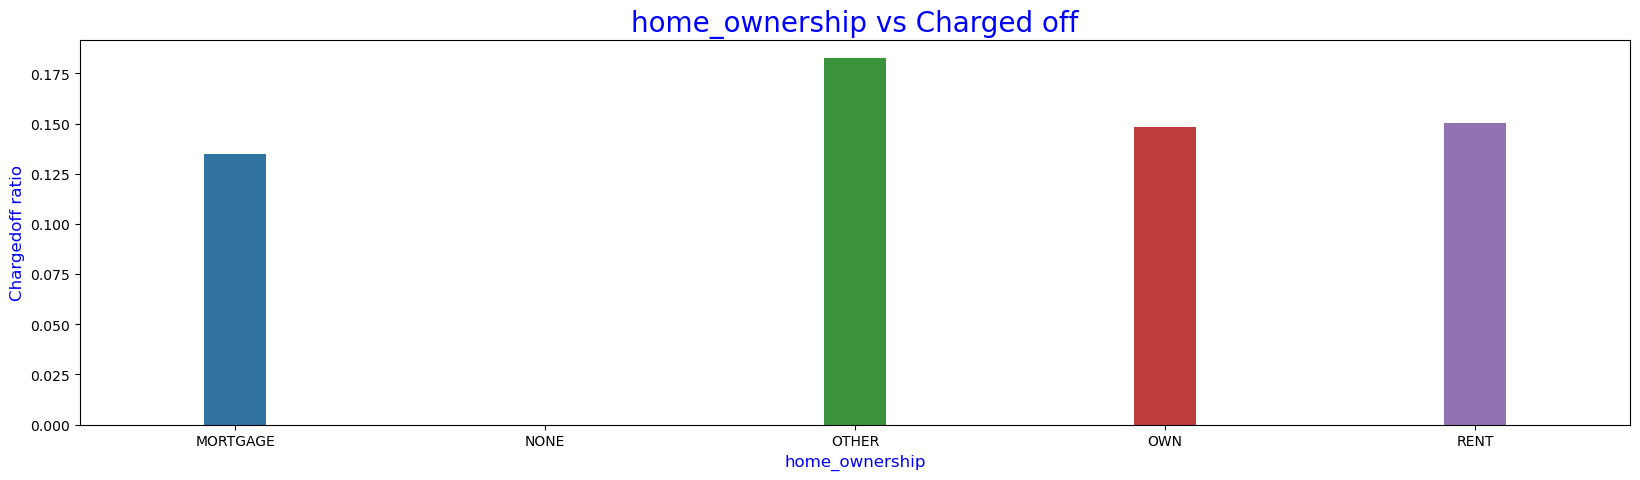

row_id,home_ownership,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
2,OTHER,17.0,0.0,76.0,93.0,0.182796
4,RENT,2774.0,405.0,15290.0,18469.0,0.150198
3,OWN,436.0,80.0,2426.0,2942.0,0.148199
0,MORTGAGE,2204.0,572.0,13591.0,16367.0,0.134661
1,NONE,0.0,0.0,3.0,3.0,0.000000


In [31]:
#analysis by home ownership

col_vs_loan_status = 'home_ownership'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review : based on the below there is no conclusive evidence that home ownership would help us decide whether customer would default or not

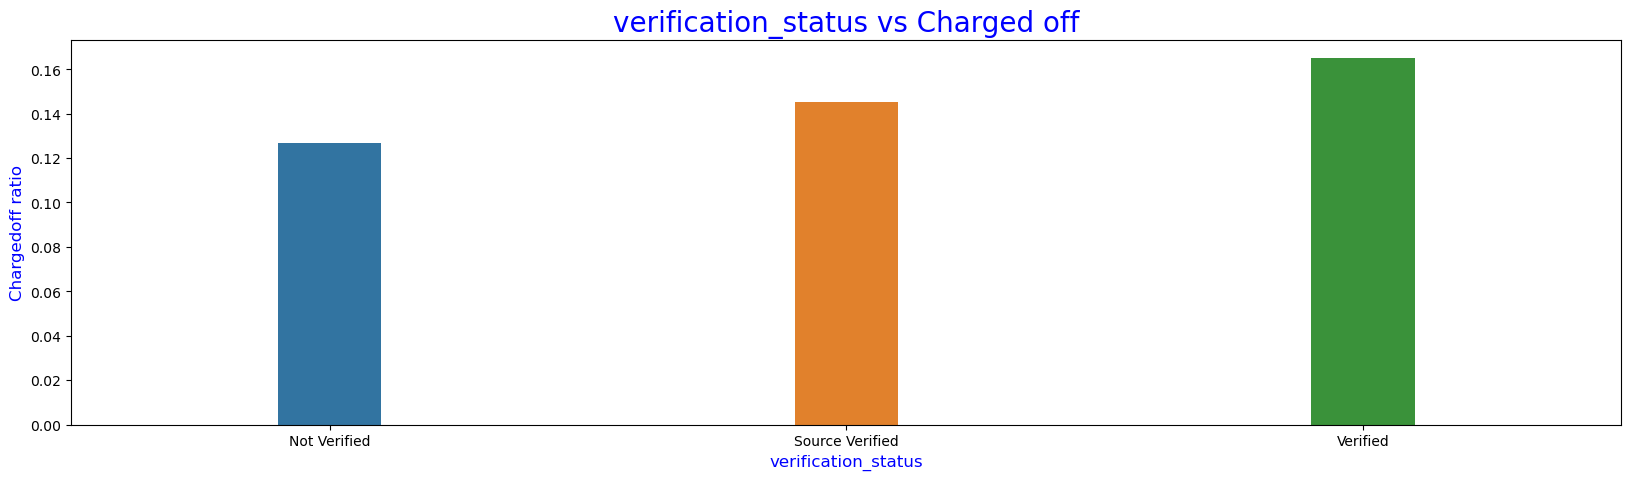

row_id,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
2,Verified,1957,550,9345,11852,0.165120
1,Source Verified,1375,282,7820,9477,0.145088
0,Not Verified,2099,225,14221,16545,0.126866


In [32]:
#analysis by verification status
col_vs_loan_status = 'verification_status'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

# There seems to be not much difference in defaulties based on the verfication status hence it would not be driving factor.

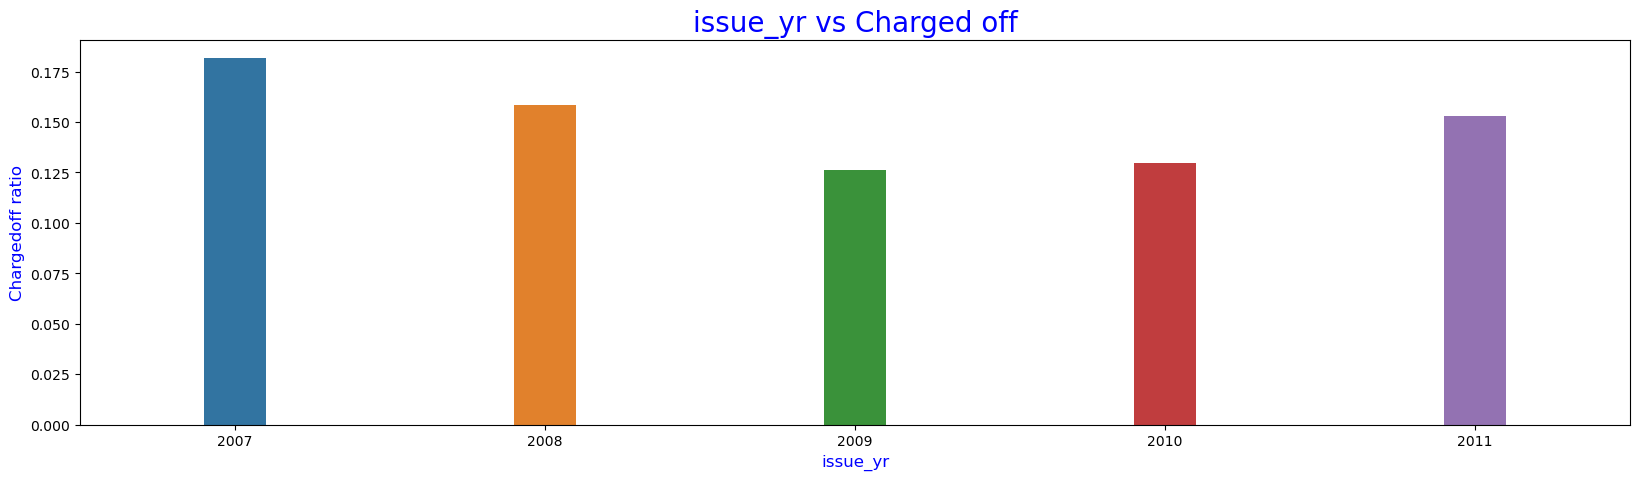

row_id,issue_yr,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
0,2007,42.0,0.0,189.0,231.0,0.181818
1,2008,237.0,0.0,1257.0,1494.0,0.158635
4,2011,3152.0,1057.0,16381.0,20590.0,0.153084
3,2010,1432.0,0.0,9629.0,11061.0,0.129464
2,2009,568.0,0.0,3930.0,4498.0,0.126278


In [33]:
#analysis by issue year

col_vs_loan_status = 'issue_yr'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review : highest defaults during recession year

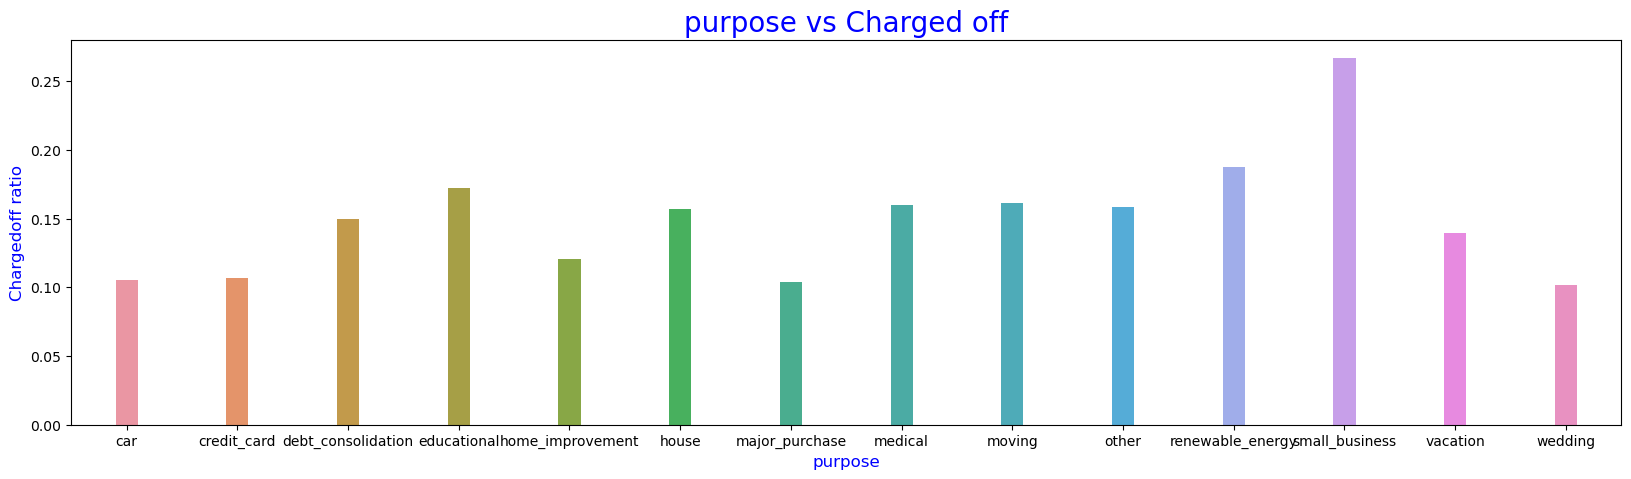

row_id,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
11,small_business,454.0,72.0,1175.0,1701.0,0.266902
10,renewable_energy,18.0,1.0,77.0,96.0,0.187500
3,educational,54.0,0.0,259.0,313.0,0.172524
8,moving,90.0,7.0,460.0,557.0,0.161580
7,medical,104.0,9.0,538.0,651.0,0.159754
9,other,607.0,116.0,3105.0,3828.0,0.158568
5,house,55.0,12.0,283.0,350.0,0.157143
2,debt_consolidation,2684.0,550.0,14695.0,17929.0,0.149702
12,vacation,52.0,6.0,314.0,372.0,0.139785
4,home_improvement,322.0,82.0,2262.0,2666.0,0.120780


In [34]:
#analysis by purpose

col_vs_loan_status = 'purpose'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#review : customers whose purpose of loan was small_business tend to default

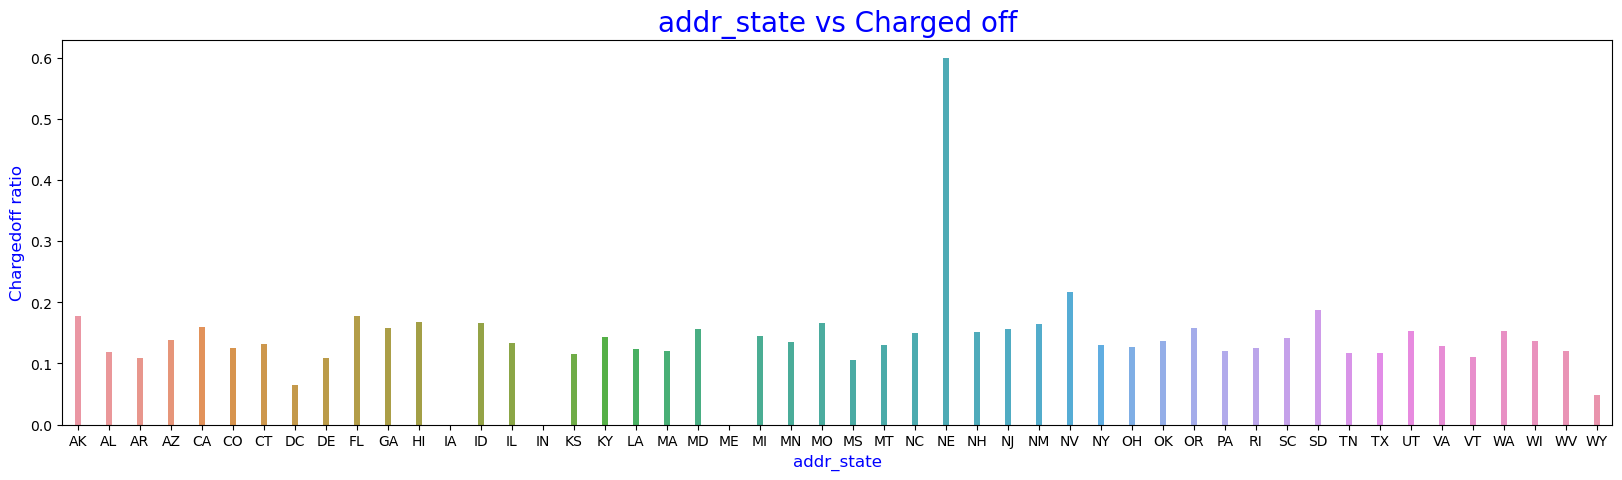

row_id,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,103.0,16.0,357.0,476.0,0.216387
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,13.0,2.0,58.0,73.0,0.178082
9,FL,487.0,80.0,2180.0,2747.0,0.177284
11,HI,28.0,7.0,132.0,167.0,0.167665
13,ID,1.0,0.0,5.0,6.0,0.166667
24,MO,111.0,16.0,541.0,668.0,0.166168
31,NM,30.0,5.0,148.0,183.0,0.163934
4,CA,1077.0,135.0,5514.0,6726.0,0.160125


In [35]:
#analysis by address state 


col_vs_loan_status = 'addr_state'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

#although customers from NE stands who defaulted, there is only few data points which cannot be conclusive. 
#But cusotmers from NV , close 21.6 % have defaulted


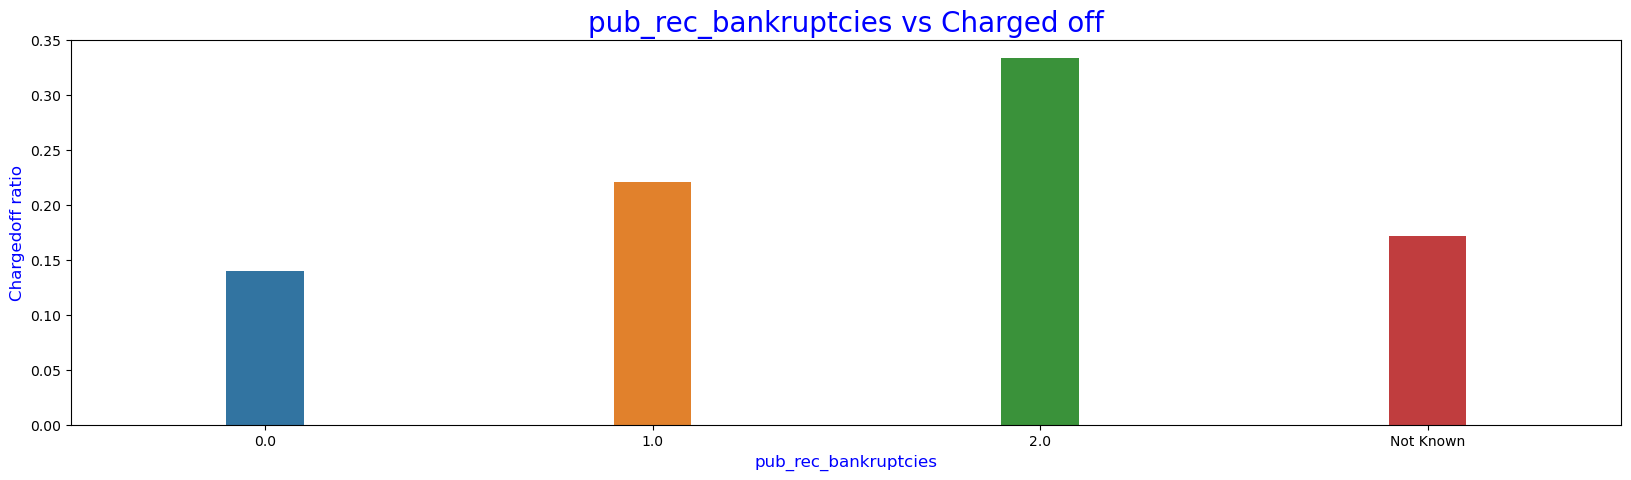

row_id,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
2,2.0,2.0,1.0,3.0,6.0,0.333333
1,1.0,361.0,35.0,1241.0,1637.0,0.220525
3,Not Known,113.0,0.0,548.0,661.0,0.170953
0,0.0,4955.0,1021.0,29594.0,35570.0,0.139303


In [36]:
# analysis by pub_rec_bankruptcies

col_vs_loan_status = 'pub_rec_bankruptcies'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

# customers who have public record bankruptcies are likely to default

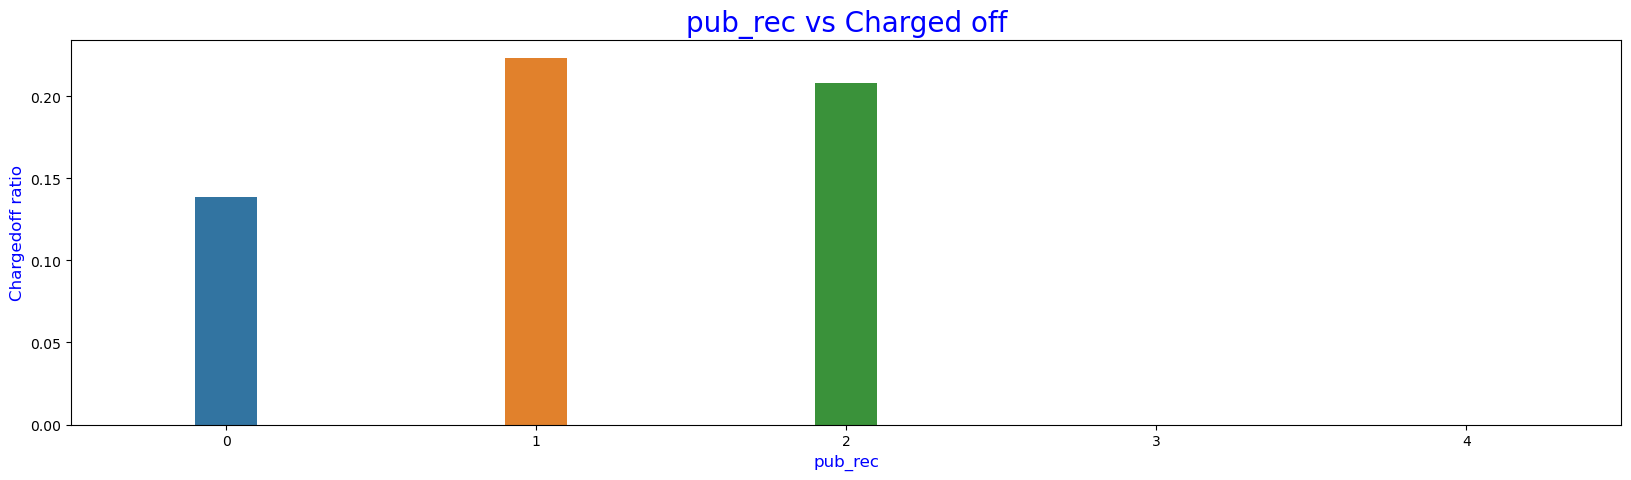

row_id,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
1,1,449.0,41.0,1520.0,2010.0,0.223383
2,2,10.0,2.0,36.0,48.0,0.208333
0,0,4972.0,1014.0,29822.0,35808.0,0.138852
3,3,0.0,0.0,6.0,6.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


In [37]:
# analysis by pub_rec

col_vs_loan_status = 'pub_rec'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)

# similar to cutomers with bankruptcies: cutomers with derogatory public records are likely to default

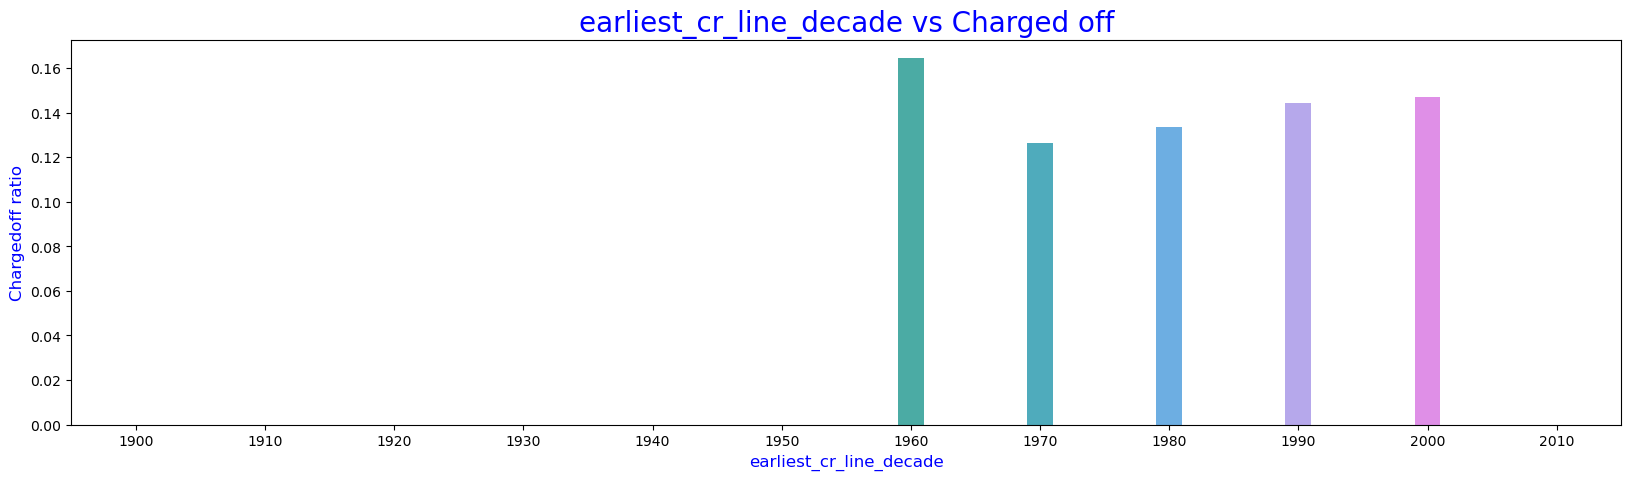

row_id,earliest_cr_line_decade,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
6,1960,26,5,127,158,0.164557
10,2000,1684,230,9539,11453,0.147036
9,1990,2952,606,16889,20447,0.144373
8,1980,651,184,4040,4875,0.133538
7,1970,118,32,785,935,0.126203
4,1940,0,0,2,2,0.000000
5,1950,0,0,4,4,0.000000
0,1900,0,0,0,0,NaN
1,1910,0,0,0,0,NaN
2,1920,0,0,0,0,NaN


In [38]:
# create a decade bins (derived variable) for the earliest_cr_line_yr field
df['earliest_cr_line_decade'] = pd.cut(df['earliest_cr_line_yr'], bins=range(1900, 2030, 10), labels=range(1900, 2020, 10))


col_vs_loan_status = 'earliest_cr_line_decade'
generate_bar_plot_by_var_vs_loan_status(df=df,col_vs_loan_status=col_vs_loan_status)
#review : There is no effective measure that we can derive from the below analysis